In [17]:
from langchain_community.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from dotenv import load_dotenv

load_dotenv()

loader = TextLoader("mediatek_mt6595.txt")
documents = loader.load()
text_splitter = CharacterTextSplitter(chunk_size=300, chunk_overlap=50)
chunks = text_splitter.split_documents(documents)

Created a chunk of size 329, which is longer than the specified 300
Created a chunk of size 828, which is longer than the specified 300
Created a chunk of size 2703, which is longer than the specified 300
Created a chunk of size 392, which is longer than the specified 300
Created a chunk of size 572, which is longer than the specified 300
Created a chunk of size 867, which is longer than the specified 300
Created a chunk of size 332, which is longer than the specified 300
Created a chunk of size 342, which is longer than the specified 300
Created a chunk of size 530, which is longer than the specified 300
Created a chunk of size 347, which is longer than the specified 300
Created a chunk of size 324, which is longer than the specified 300
Created a chunk of size 450, which is longer than the specified 300
Created a chunk of size 312, which is longer than the specified 300
Created a chunk of size 394, which is longer than the specified 300
Created a chunk of size 458, which is longer th

In [39]:
documents

[Document(page_content='MEDIATEK \n\n\nMT6595 \n\nOcta-Core Smartphone \nApplication Processor \nTechnical Brief \n\n\nVersion: 0.3 \nRelease date: 2013-12-31 \n\n\n© 2011 - 2014 MediaTek Inc. \nThis document contains information that is proprietary to MediaTek Inc. \nUnauthorized reproduction or disclosure of this information in whole or in part is strictly prohibited. \n\n\nSpecifications are subject to change without notice. \n\n\nMT6595 \n\n\nOcta-Core Smartph \nM E D Li TER Apple ee \n\n\nTechnical Brief \n\n\nDocument Revision History \n\n\n[Revision | ^ Date | Author  [ Description \n2013-10-24 Kelly Teng \n\n\naa | KelyTeng | — — — — LL \nIE [ KelyTem | — — — — — — \n\n\nMediaTek Confidential © 2013 - 2014 MediaTek Inc. Page 2 of 73 \nThis document contains information that is proprietary to MediaTek Inc. \nUnauthorized reproduction or disclosure of this information in whole or in part is strictly prohibited. \n\n\nMT6595 \n\n\nOcta-C Smartphone \nM E D Li TER RENE ee \n\n\nTec

In [40]:
chunks

[Document(page_content='MEDIATEK \n\n\nMT6595 \n\nOcta-Core Smartphone \nApplication Processor \nTechnical Brief \n\n\nVersion: 0.3 \nRelease date: 2013-12-31', metadata={'source': 'mediatek_mt6595.txt', 'file_name': 'mediatek_mt6595.txt'}),
 Document(page_content='Version: 0.3 \nRelease date: 2013-12-31 \n\n\n© 2011 - 2014 MediaTek Inc. \nThis document contains information that is proprietary to MediaTek Inc. \nUnauthorized reproduction or disclosure of this information in whole or in part is strictly prohibited.', metadata={'source': 'mediatek_mt6595.txt', 'file_name': 'mediatek_mt6595.txt'}),
 Document(page_content='Specifications are subject to change without notice. \n\n\nMT6595 \n\n\nOcta-Core Smartph \nM E D Li TER Apple ee \n\n\nTechnical Brief \n\n\nDocument Revision History \n\n\n[Revision | ^ Date | Author  [ Description \n2013-10-24 Kelly Teng \n\n\naa | KelyTeng | — — — — LL \nIE [ KelyTem | — — — — — —', metadata={'source': 'mediatek_mt6595.txt', 'file_name': 'mediatek_mt

In [41]:
# RAGAS expects a file_name dict as key
for document in chunks:
    document.metadata['file_name'] = document.metadata['source']

In [24]:
from ragas.testset.generator import TestsetGenerator
from ragas.testset.evolutions import simple, reasoning, multi_context
import os
os.environ['OPENAI_API_KEY'] = '<your api key>'

generator = TestsetGenerator.with_openai()

testset = generator.generate_with_langchain_docs(chunks, test_size=10, distributions={simple: 0.5, reasoning: 0.25, multi_context: 0.25})

embedding nodes:   0%|          | 0/772 [00:00<?, ?it/s]

Task exception was never retrieved
future: <Task finished name='Task-5763' coro=<AsyncClient.aclose() done, defined at c:\Users\kuotz\anaconda3\envs\langchian2\lib\site-packages\httpx\_client.py:1967> exception=RuntimeError('Event loop is closed')>
Traceback (most recent call last):
  File "c:\Users\kuotz\anaconda3\envs\langchian2\lib\site-packages\httpx\_client.py", line 1974, in aclose
    await self._transport.aclose()
  File "c:\Users\kuotz\anaconda3\envs\langchian2\lib\site-packages\httpx\_transports\default.py", line 378, in aclose
    await self._pool.aclose()
  File "c:\Users\kuotz\anaconda3\envs\langchian2\lib\site-packages\httpcore\_async\connection_pool.py", line 313, in aclose
    await self._close_connections(closing_connections)
  File "c:\Users\kuotz\anaconda3\envs\langchian2\lib\site-packages\httpcore\_async\connection_pool.py", line 305, in _close_connections
    await connection.aclose()
  File "c:\Users\kuotz\anaconda3\envs\langchian2\lib\site-packages\httpcore\_asyn

Generating:   0%|          | 0/20 [00:00<?, ?it/s]

max retries exceeded for SimpleEvolution(generator_llm=LangchainLLMWrapper(run_config=RunConfig(timeout=60, max_retries=15, max_wait=90, exception_types=<class 'openai.RateLimitError'>)), docstore=InMemoryDocumentStore(splitter=<langchain.text_splitter.TokenTextSplitter object at 0x000001448BCC9A20>, nodes=[Node(page_content='In the heart of the bustling city of Whiskerville, there stood a peculiar establishment unlike any other - the Feline Financial Bank, a bank exclusively for cats. This extraordinary institution was founded by Sir Purrington, a visionary Siamese cat who believed that every feline deserved a place to secure their precious belongings - be it their beloved toys, treasured catnip, or the much-coveted tuna treats.', metadata={'source': 'catbank.txt', 'file_name': 'catbank.txt'}, doc_id='1fabc4e4-9239-4217-975c-a8056ee7bba4', filename='1fabc4e4-9239-4217-975c-a8056ee7bba4'), Node(page_content='The architecture of the bank was a marvel in itself. Crafted with sleek lines 

In [25]:
testset.to_pandas()

,question,contexts,ground_truth,evolution_type,episode_done
0,What features of the bank's architecture make ...,[The architecture of the bank was a marvel in ...,The features of the bank's architecture that m...,simple,True
1,Who founded the Feline Financial Bank and what...,[In the heart of the bustling city of Whiskerv...,The Feline Financial Bank was founded by Sir P...,simple,True
2,"Who founded the Feline Financial Bank, a bank ...",[In the heart of the bustling city of Whiskerv...,Sir Purrington founded the Feline Financial Ba...,simple,True
3,Who founded the Feline Financial Bank and what...,[In the heart of the bustling city of Whiskerv...,The Feline Financial Bank was founded by Sir P...,simple,True
4,Who founded the Feline Financial Bank and what...,[In the heart of the bustling city of Whiskerv...,The Feline Financial Bank was founded by Sir P...,simple,True
5,Who founded the Feline Financial Bank and what...,[In the heart of the bustling city of Whiskerv...,The Feline Financial Bank was founded by Sir P...,simple,True
6,What was the atmosphere like inside the bank a...,"[Inside, the bank was a haven of tranquility a...",The atmosphere inside the bank was described a...,simple,True
7,What features were incorporated into the bank'...,[The architecture of the bank was a marvel in ...,The features incorporated into the bank's arch...,simple,True
8,Who founded the Feline Financial Bank and what...,[In the heart of the bustling city of Whiskerv...,The Feline Financial Bank was founded by Sir P...,simple,True
9,Who founded the Feline Financial Bank and what...,[In the heart of the bustling city of Whiskerv...,The Feline Financial Bank was founded by Sir P...,simple,True


In [7]:
#from datasets import load_dataset

# loading the V2 dataset
# amnesty_qa = load_dataset("explodinggradients/amnesty_qa", "english_v2")["eval"]
# amnesty_qa

In [26]:
from langchain_openai.embeddings import OpenAIEmbeddings

from langchain_community.vectorstores import Chroma
from langchain_openai import ChatOpenAI

embedding = OpenAIEmbeddings()
model = ChatOpenAI()

vectorstore = Chroma.from_documents(chunks, embedding)
retriever = vectorstore.as_retriever()

In [28]:
from langchain_core.prompts import PromptTemplate

template = """Answer the question based only on the following context:
{context}

Question: {question}
"""

prompt = PromptTemplate(
    template=template,
    input_variables=["context","question"]
  )

In [29]:
from langchain.schema.runnable import RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser

rag_chain = (
    {"context": retriever,  "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

In [31]:
questions = testset.to_pandas()["question"].to_list()
ground_truth = testset.to_pandas()["ground_truth"].to_list()

In [32]:
questions

["What features of the bank's architecture make it cat-friendly and comfortable for lounging?",
 'Who founded the Feline Financial Bank and what was their vision for the bank?',
 'Who founded the Feline Financial Bank, a bank exclusively for cats?',
 'Who founded the Feline Financial Bank and what was their vision for the establishment?',
 'Who founded the Feline Financial Bank and what was their vision behind it?',
 'Who founded the Feline Financial Bank and what was their vision behind it?',
 'What was the atmosphere like inside the bank and how did the tellers contribute to maintaining tranquility and order?',
 "What features were incorporated into the bank's architecture to make it cat-friendly and elegant?",
 'Who founded the Feline Financial Bank and what was their vision behind it?',
 'Who founded the Feline Financial Bank and what was their vision behind it?',
 'What was the name of the founder of the Feline Financial Bank and what motivated them to establish it?',
 'What was t

In [33]:
from datasets import Dataset

questions = testset.to_pandas()["question"].to_list()
ground_truth = testset.to_pandas()["ground_truth"].to_list()

data = {"question": [], "answer": [], "contexts": [], "ground_truth": ground_truth}

for query in questions:
    data["question"].append(query)
    data["answer"].append(rag_chain.invoke(query))
    data["contexts"].append([doc.page_content for doc in retriever.get_relevant_documents(query)])

dataset = Dataset.from_dict(data)

In [34]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_relevancy,
    context_recall,
    context_precision,
)
try:
    result = evaluate(
        dataset = dataset,
        metrics=[
            context_relevancy,
            context_precision,
            context_recall,
            faithfulness,
            answer_relevancy,
        ],
        raise_exceptions=False
    )
except Exception as e:
    print(e)
    # Additional debugging or logging can be done here

Evaluating:   0%|          | 0/85 [00:00<?, ?it/s]

In [35]:
result.to_pandas()

,question,answer,contexts,ground_truth,context_relevancy,context_precision,context_recall,faithfulness,answer_relevancy
0,What features of the bank's architecture make ...,"The bank's architecture features sleek lines, ...",[The architecture of the bank was a marvel in ...,The features of the bank's architecture that m...,0.100000,1.000000,1.000000,1.0,0.914875
1,Who founded the Feline Financial Bank and what...,"Sir Purrington, a visionary Siamese cat, found...",[Feline Financial Bank was not just a bank; it...,The Feline Financial Bank was founded by Sir P...,0.333333,0.500000,1.000000,1.0,0.957983
2,"Who founded the Feline Financial Bank, a bank ...","Sir Purrington, a visionary Siamese cat",[In the heart of the bustling city of Whiskerv...,Sir Purrington founded the Feline Financial Ba...,0.111111,0.833333,1.000000,1.0,0.980829
3,Who founded the Feline Financial Bank and what...,"Sir Purrington, a visionary Siamese cat, found...",[Feline Financial Bank was not just a bank; it...,The Feline Financial Bank was founded by Sir P...,0.333333,0.500000,1.000000,1.0,0.955557
4,Who founded the Feline Financial Bank and what...,"Sir Purrington, a visionary Siamese cat, found...",[Feline Financial Bank was not just a bank; it...,The Feline Financial Bank was founded by Sir P...,0.333333,0.500000,1.000000,1.0,0.960927
5,Who founded the Feline Financial Bank and what...,"Sir Purrington, a visionary Siamese cat, found...",[Feline Financial Bank was not just a bank; it...,The Feline Financial Bank was founded by Sir P...,0.444444,0.500000,1.000000,1.0,0.961018
6,What was the atmosphere like inside the bank a...,"Inside the bank, the atmosphere was described ...","[Inside, the bank was a haven of tranquility a...",The atmosphere inside the bank was described a...,0.100000,1.000000,1.000000,1.0,0.948277
7,What features were incorporated into the bank'...,"The bank's architecture featured sleek lines, ...",[The architecture of the bank was a marvel in ...,The features incorporated into the bank's arch...,0.100000,1.000000,1.000000,1.0,0.935185
8,Who founded the Feline Financial Bank and what...,"Sir Purrington, a visionary Siamese cat, found...",[Feline Financial Bank was not just a bank; it...,The Feline Financial Bank was founded by Sir P...,0.444444,0.500000,1.000000,1.0,0.960927
9,Who founded the Feline Financial Bank and what...,"Sir Purrington, a visionary Siamese cat, found...",[Feline Financial Bank was not just a bank; it...,The Feline Financial Bank was founded by Sir P...,0.444444,0.500000,1.000000,1.0,0.960938


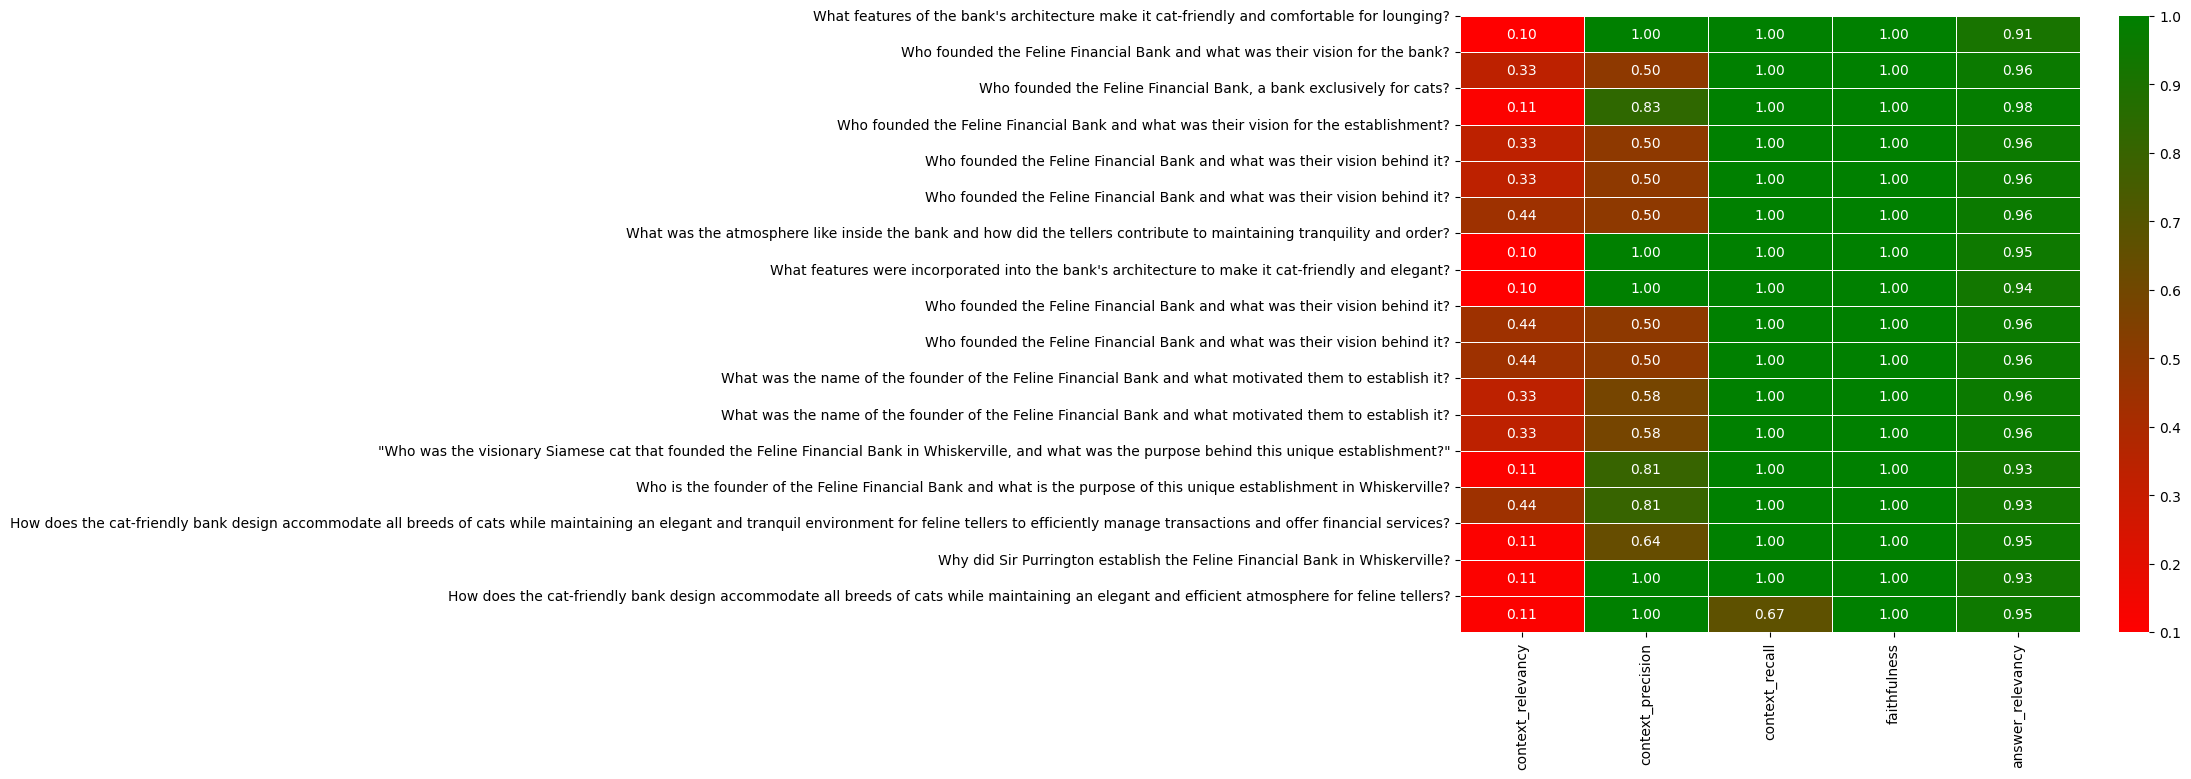

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

df = result.to_pandas()

heatmap_data = df[['context_relevancy', 'context_precision', 'context_recall', 'faithfulness', 'answer_relevancy']]

cmap = LinearSegmentedColormap.from_list('green_red', ['red', 'green'])

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", linewidths=.5, cmap=cmap)

plt.yticks(ticks=range(len(df['question'])), labels=df['question'], rotation=0)

plt.show()


### Add LangFuse

In [ ]:
from langfuse import Langfuse

langfuse = Langfuse(
  secret_key="sk-lf-8be80c67-4187-4e43-9d01-544195dc9f03",
  public_key="pk-lf-d7653f64-8086-4365-b05c-865ead3478a3",
  host="http://localhost:3000"
)

In [ ]:
trace = langfuse.trace(
    name = "eval",
    user_id = "eval_user",
    metadata = {
        "email": "prod@company.com",
    },
    tags = ["evaluation"]
)

In [ ]:
df = result.to_pandas()

In [ ]:
for _, row in df.iterrows():
    for metric_name in ["faithfulness", "answer_relevancy", "context_recall"]:
        langfuse.score(
            name=metric_name,
            value=row[metric_name],
            trace_id=trace.id
        )